# House Price Prediction

Data fields
Here's a brief description file of features.

 - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
 - MSSubClass: The building class:  categorical 15 unique
 - MSZoning: The general zoning classification
 - LotFrontage: Linear feet of street connected to property
 - LotArea: Lot size in square feet
 - Street: Type of road access
 - Alley: Type of alley access
 - LotShape: General shape of property
 - LandContour: Flatness of the property
 - Utilities: Type of utilities available
 - LotConfig: Lot configuration
 - LandSlope: Slope of property
 - Neighborhood: Physical locations within Ames city limits
 - Condition1: Proximity to main road or railroad
 - Condition2: Proximity to main road or railroad (if a second is present)
 - BldgType: Type of dwelling
 - HouseStyle: Style of dwelling
 - OverallQual: Overall material and finish quality
 - OverallCond: Overall condition rating
 - YearBuilt: Original construction date
 - YearRemodAdd: Remodel date
 - RoofStyle: Type of roof
 - RoofMatl: Roof material
 - Exterior1st: Exterior covering on house
 - Exterior2nd: Exterior covering on house (if more than one material)
 - MasVnrType: Masonry veneer type
 - MasVnrArea: Masonry veneer area in square feet
 - ExterQual: Exterior material quality
 - ExterCond: Present condition of the material on the exterior
 - Foundation: Type of foundation
 - BsmtQual: Height of the basement
 - BsmtCond: General condition of the basement
 - BsmtExposure: Walkout or garden level basement walls
 - BsmtFinType1: Quality of basement finished area
 - BsmtFinSF1: Type 1 finished square feet
 - BsmtFinType2: Quality of second finished area (if present)
 - BsmtFinSF2: Type 2 finished square feet
 - BsmtUnfSF: Unfinished square feet of basement area
 - TotalBsmtSF: Total square feet of basement area
 - Heating: Type of heating
 - HeatingQC: Heating quality and condition
 - CentralAir: Central air conditioning
 - Electrical: Electrical system
 - 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
 - LowQualFinSF: Low quality finished square feet (all floors)
 - GrLivArea: Above grade (ground) living area square feet
 - BsmtFullBath: Basement full bathrooms
 - BsmtHalfBath: Basement half bathrooms
 - FullBath: Full bathrooms above grade
 - HalfBath: Half baths above grade
 - Bedroom: Number of bedrooms above basement level
 - Kitchen: Number of kitchens
 - KitchenQual: Kitchen quality
 - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
 - Functional: Home functionality rating
 - Fireplaces: Number of fireplaces
 - FireplaceQu: Fireplace quality
 - GarageType: Garage location
 - GarageYrBlt: Year garage was built
 - GarageFinish: Interior finish of the garage
 - GarageCars: Size of garage in car capacity
 - GarageArea: Size of garage in square feet
 - GarageQual: Garage quality
 - GarageCond: Garage condition
 - PavedDrive: Paved driveway
 - WoodDeckSF: Wood deck area in square feet
 - OpenPorchSF: Open porch area in square feet
 - EnclosedPorch: Enclosed porch area in square feet
 - 3SsnPorch: Three season porch area in square feet
 - ScreenPorch: Screen porch area in square feet
 - PoolArea: Pool area in square feet
 - PoolQC: Pool quality
 - Fence: Fence quality
 - MiscFeature: Miscellaneous feature not covered in other categories
 - MiscVal: $Value of miscellaneous feature
 - MoSold: Month Sold
 - YrSold: Year Sold
 - SaleType: Type of sale
 - SaleCondition: Condition of sale

 - Imputing missing values by proceeding sequentially through the data
 - Transforming some numerical variables that seem really categorical
 - Label Encoding some categorical variables that may contain information in their ordering set
 - Box Cox Transformation of skewed features (instead of log-transformation) : This gave me a slightly better result both on leaderboard and cross-validation
 - Getting dummy variables for categorical features.



## Imports

In [117]:
# import main libraries
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [118]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #limiting floats output to 3 decimal points


## Load Data

In [119]:
train_df = pd.read_csv('/Users/alex/Documents/house-prices-advanced-regression-techniques (1)/train.csv')
test_df = pd.read_csv('/Users/alex/Documents/house-prices-advanced-regression-techniques (1)/test.csv')

print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [120]:
# base columns
base_columns = list(train_df) + list(test_df)


In [121]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


## EDA and Feature Engeneering

### Data type

In [122]:
# check column types
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

### Check Unique Categorical Features

In [123]:
# as we have categorical features let's explore unique values
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

### Explore Integer Features

In [124]:
# explore int columns
train_df.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

### Basic correlations

In [125]:
# check correlations of numerical data
for col in list(train_df):
    if train_df[col].dtype!='O':
        print(col, ':', np.corrcoef(train_df['SalePrice'], train_df[col] )[0,1])

Id : -0.02191671944343111
MSSubClass : -0.08428413512659526
LotFrontage : nan
LotArea : 0.26384335387140573
OverallQual : 0.7909816005838048
OverallCond : -0.077855894048678
YearBuilt : 0.5228973328794969
YearRemodAdd : 0.5071009671113864
MasVnrArea : nan
BsmtFinSF1 : 0.38641980624215316
BsmtFinSF2 : -0.011378121450215136
BsmtUnfSF : 0.21447910554696895
TotalBsmtSF : 0.6135805515591956
1stFlrSF : 0.6058521846919147
2ndFlrSF : 0.3193338028320677
LowQualFinSF : -0.02560613000067959
GrLivArea : 0.7086244776126522
BsmtFullBath : 0.22712223313149404
BsmtHalfBath : -0.01684415429735902
FullBath : 0.5606637627484456
HalfBath : 0.2841076755947829
BedroomAbvGr : 0.16821315430073996
KitchenAbvGr : -0.1359073708421411
TotRmsAbvGrd : 0.5337231555820284
Fireplaces : 0.46692883675152763
GarageYrBlt : nan
GarageCars : 0.6404091972583531
GarageArea : 0.6234314389183617
WoodDeckSF : 0.3244134445681295
OpenPorchSF : 0.31585622711605543
EnclosedPorch : -0.1285779579259565
3SsnPorch : 0.04458366533574845


### Handle Outliers of High Correlation 

##### GrLivArea Corr 0.708

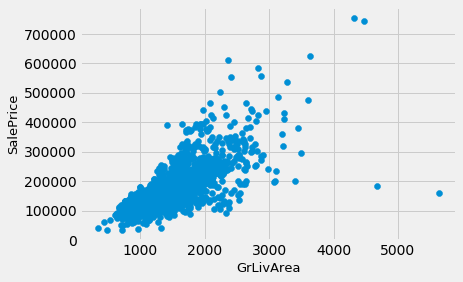

In [126]:
# plot target and living area square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [127]:
# Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<200000)].index)

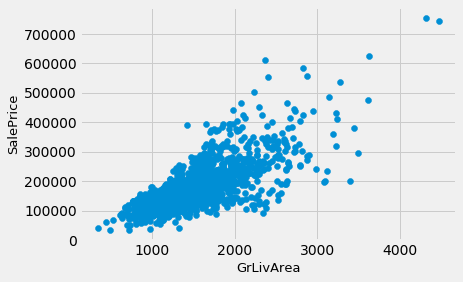

In [128]:

fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

##### OverallQual

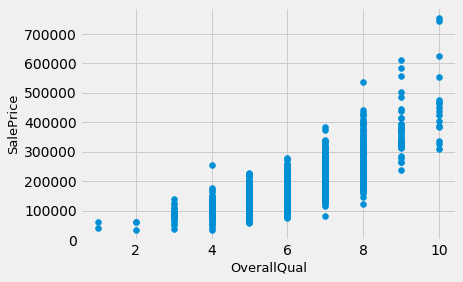

In [129]:
# target and overall quality
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

##### 1stFlrSF

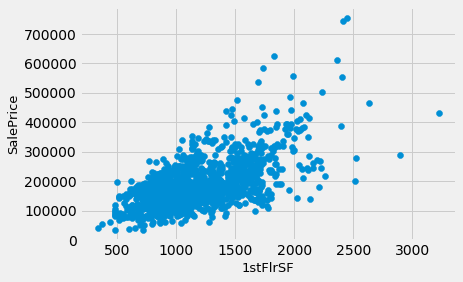

In [130]:
# target and First Floor square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

##### GarageArea

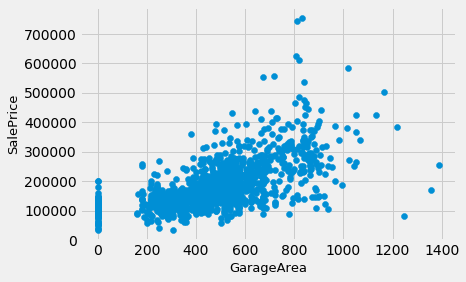

In [131]:
# target and garage area
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

##### YearBuilt

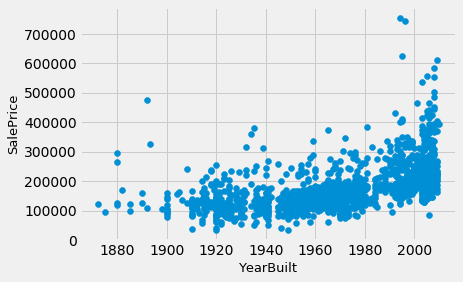

In [132]:
# target and year built
fig, ax = plt.subplots()
ax.scatter(x = train_df['YearBuilt'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

### Explore NANs

In [133]:
# function to chekc missing values
def missing_values_table(df):
        # total missing values
        mis_val = df.isnull().sum()
        
        # percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # return the dataframe with missing information
        return mis_val_table_ren_columns

In [134]:
# missing values
missing_values_table(train_df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1452,99.600
MiscFeature,1404,96.300
Alley,1367,93.800
Fence,1177,80.700
FireplaceQu,690,47.300
LotFrontage,259,17.800
GarageType,81,5.600
GarageYrBlt,81,5.600
GarageFinish,81,5.600
GarageQual,81,5.600


### Concatanate Train and Test Data Frames

In [135]:
# extract labels
TARGET = train_df.pop('SalePrice')

In [136]:
# number of rows in train and test data
nr_train = train_df.shape[0]
nr_test = test_df.shape[0]

In [137]:
# concatanate dfs to allign imputations
data = pd.concat((train_df, test_df)).reset_index(drop=True)
data.shape

(2917, 80)

### Imputations

In [138]:
# import Imputer
from sklearn.preprocessing import Imputer

##### Categorical Imputations with 'none'

In [139]:
# fill missing values with 'none'
for col in ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']:
    data[col].fillna('none', inplace=True)

##### Categorical Imputations with 0

In [140]:
# fill missing values with zeros
for col in ['GarageYrBlt', 'MasVnrArea', 'Electrical']:
    data[col].fillna(0, inplace=True)

##### Categorical Imputations with median

In [141]:
# use Imputer to replace nan with median
imp = Imputer(missing_values='NaN', strategy='median', axis=1)
data[['LotFrontage', 'TotalBsmtSF', 'GarageArea']] = imp.fit_transform(data[['LotFrontage', 'TotalBsmtSF', 'GarageArea']])


##### Categorical Imputations with mode

In [142]:
# fill missing with the most frequent values
for col in ['MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual', 'GarageCars', 'SaleType','Exterior2nd']:
    data[col] = data[col].fillna(data[col].mode()[0])


##### Drop columns

In [143]:
# drop columns
data.drop(['PoolQC', 'Utilities'],   axis=1, inplace=True)

##### Test Mission Values

In [144]:
# check missing values
missing_values_table(data)

Your selected dataframe has 78 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### TARGET variable

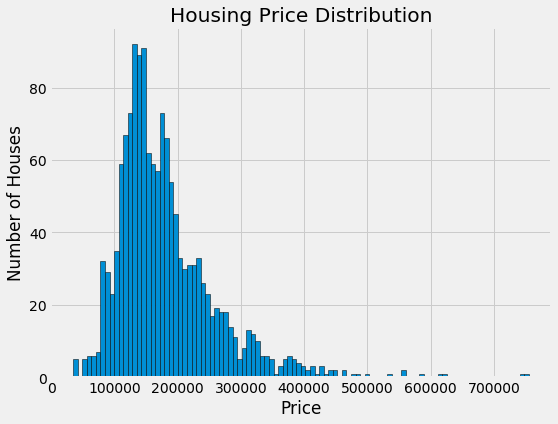

In [145]:
# create Target label distribution
plt.figure(figsize=(8, 6))

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(TARGET, bins = 100, edgecolor = 'k');
plt.xlabel('Price'); plt.ylabel('Number of Houses'); 
plt.title('Housing Price Distribution');

Right skewed distribution. Let's apply log transformation

#### Log Transformation

In [146]:
# return the natural logarithm of one plus the input array
TARGET_log = np.log1p(TARGET)

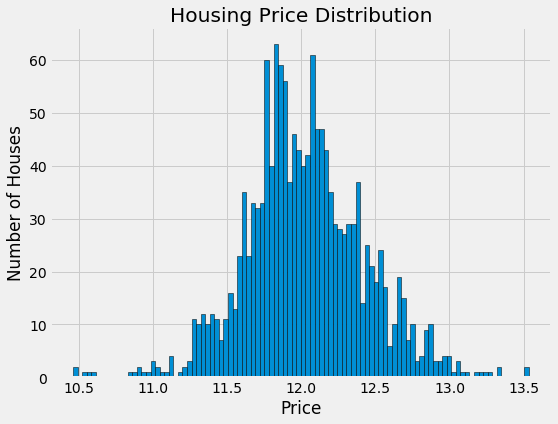

In [147]:
# create Target label distribution
plt.figure(figsize=(8, 6))

# histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(TARGET_log, bins = 100, edgecolor = 'k');
plt.xlabel('Price'); plt.ylabel('Number of Houses'); 
plt.title('Housing Price Distribution');

#### QQ Plot

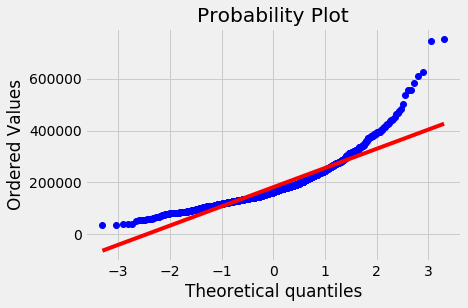

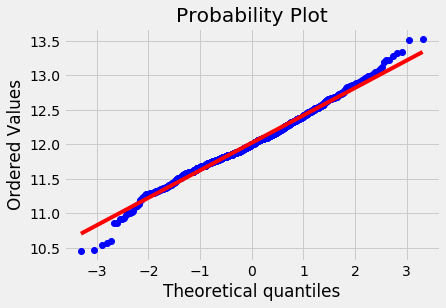

In [148]:
# compare target label and transformed target label with QQ-plot
fig = plt.figure()
res = stats.probplot(TARGET, plot=plt)

fig = plt.figure()
res = stats.probplot(TARGET_log, plot=plt)


plt.show()

### Integer Features

In [149]:
# check int features
data.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Id               2917
MSSubClass         16
LotArea          1949
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
1stFlrSF         1081
2ndFlrSF          633
LowQualFinSF       36
GrLivArea        1290
FullBath            5
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       14
Fireplaces          5
WoodDeckSF        379
OpenPorchSF       250
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           13
MiscVal            38
MoSold             12
YrSold              5
dtype: int64

##### Convert some int features to object

In [150]:
# convert numerical cols to categorical
for col in ['MSSubClass', 'OverallQual', 'OverallCond', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']:
    data[col] = data[col].apply(str)

### Create new feautres

In [151]:
# total month sold feature
data['month_total'] = data['YrSold'].map({'2010': 0, '2009': 12, '2008': 24, '2007': 36, '2006': 48}) + data['MoSold'].apply(int)

In [152]:
# add closed porch to leaving area
data['TotalFsf'] = data['GrLivArea'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['3SsnPorch']

In [153]:
# Total rooms 
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].apply(int)

In [154]:
# check unique values
data.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Id               2917
LotArea          1949
YearBuilt         118
YearRemodAdd       61
1stFlrSF         1081
2ndFlrSF          633
LowQualFinSF       36
GrLivArea        1290
TotRmsAbvGrd       14
WoodDeckSF        379
OpenPorchSF       250
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
month_total        55
TotalFsf         1326
dtype: int64

### Correlations

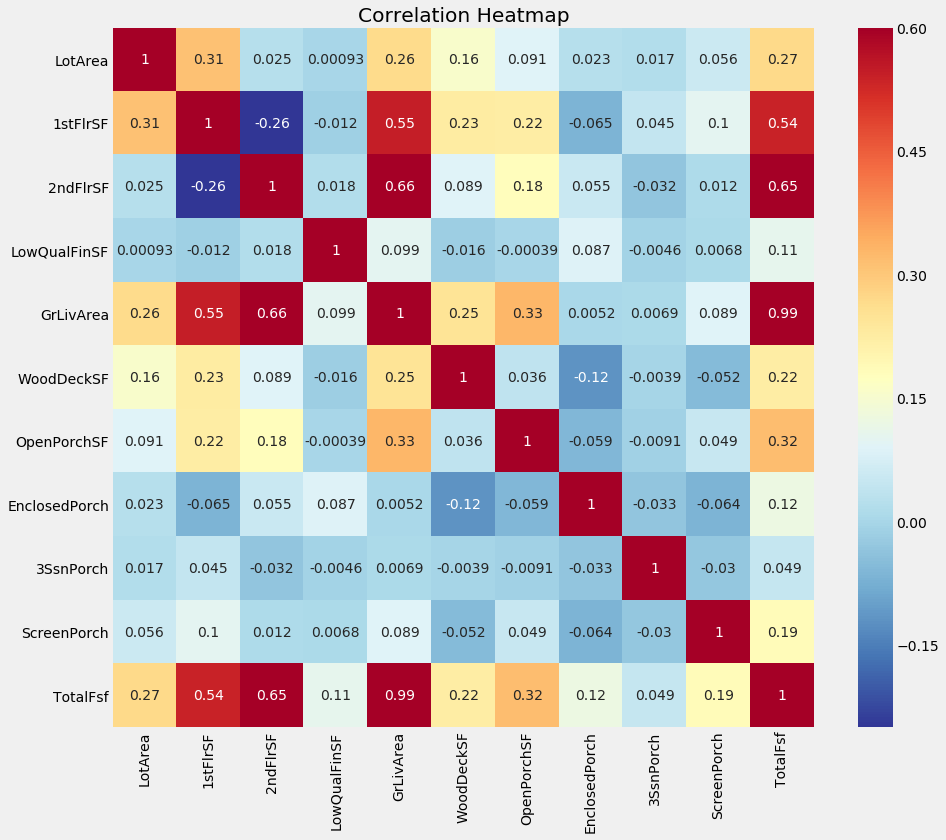

In [155]:
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(data[['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalFsf']].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Improve Skewness with Box Cox

In [156]:
# numeric features indeces
numeric_feats = data.dtypes[data.dtypes != "object"].index

# check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945
BsmtHalfBath,3.930
MasVnrArea,2.622
OpenPorchSF,2.529
LotFrontage,2.243


In [157]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
    

There are 27 skewed numerical features to Box Cox transform


In [158]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
3SsnPorch,8.922
LowQualFinSF,8.741
BsmtHalfBath,3.787
ScreenPorch,2.977
BsmtFinSF2,2.563
EnclosedPorch,2.024
LotFrontage,1.572
MasVnrArea,0.637
BsmtFullBath,0.442
2ndFlrSF,0.329



 mu = 3.02 and sigma = 0.10



Text(0.5, 1.0, 'TARGET distribution')

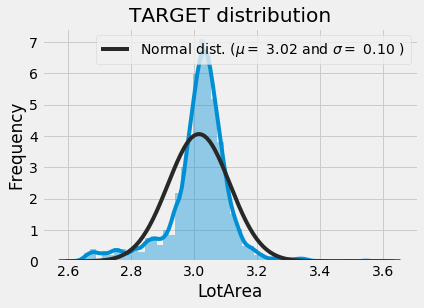

In [159]:
sns.distplot(np.log1p(data['LotArea']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(data['LotArea']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TARGET distribution')

### One hot encoding

In [160]:
# categorical number of unique values
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSSubClass       16
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
FullBath          5
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
KitchenQual       4
Functional        7
Fireplaces        5
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolArea         13
Fence             5
MiscFeature       5
MiscVal          38
MoSold           12


### Label Encoding

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Street', 'PoolArea']:
    data[col] = le.fit_transform(data[col])

In [162]:
data.drop(['MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)

### One-hot Encoding

In [163]:

# one hot encoding
for col in list(data):
    if data[col].dtype=='O':
        encoded_columns = pd.get_dummies(data[col], prefix=col)
        data = data.join(encoded_columns).drop(col, axis=1)

In [164]:
data.shape

(2917, 348)

## Modeling

In [165]:
# sklearn models, metrics and tools
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import scipy

# gradient boosting
import xgboost as xgb
import lightgbm as lgb

In [166]:
train = data[:nr_train]
test = data[nr_train:]

In [167]:
print(train.shape)
print(test.shape)

(1458, 348)
(1459, 348)


### Metrics (MAE, RMSE)

In [168]:
# calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

### Train test

In [169]:
train.drop(['TotalFsf'], axis=1, inplace=True)
test.drop(['TotalFsf'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(1458, 347)
(1459, 347)


In [170]:
print(train.shape)
print(test.shape)

(1458, 347)
(1459, 347)


In [171]:
# add transformed target
train['TARGET'] = TARGET_log

# get train and test set for basic model
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Id'], axis=1), TARGET_log, 
                                   test_size = 0.25, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1093, 347)
(365, 347)
(1093,)
(365,)


### Navie Baseline

Simple naive baseline is to guess the median value on the training set

In [172]:
# naive baseline is the median
median_pred = X_train['TARGET'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['TARGET']

In [173]:
# display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.3252
Median Baseline RMSE: 0.4273


### Standard Models (Lasso, ElasticNet, Random Forest, Ridge, SVM, Gradient Boosted)

In [174]:
# evaluate several models
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Lasso', 'ElasticNet Regression',
                      'Random Forest', 'Ridge', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='TARGET')
    X_test = X_test.drop(columns='TARGET')
    
    # Instantiate the models
    model1 = Lasso(random_state=42)
    model2 = make_pipeline(RobustScaler(), ElasticNet(random_state=42))
    model3 = RandomForestRegressor(random_state=42)
    model4 = Ridge(random_state=42)
    model5 = SVR()
    model6 = GradientBoostingRegressor(random_state=42)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [175]:
results = evaluate(X_train, X_test, y_train, y_test)

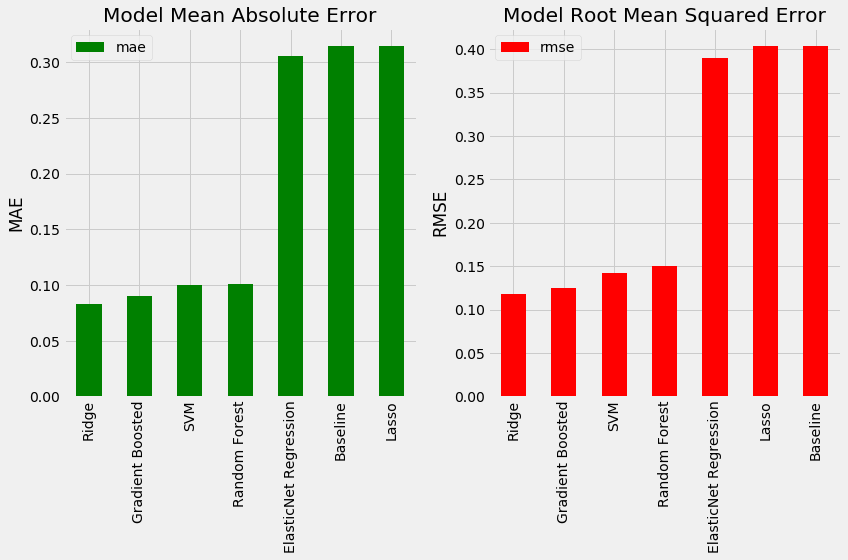

In [176]:
plt.figure(figsize=(12, 8))
#matplotlib.rcParams['font.size'] = 10
# Root mean squared error
ax =  plt.subplot(1, 2,1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'g', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [177]:
# basic models performance
results

,mae,rmse
Lasso,0.315,0.403
ElasticNet Regression,0.305,0.390
Random Forest,0.101,0.150
Ridge,0.083,0.118
SVM,0.101,0.142
Gradient Boosted,0.090,0.126
Baseline,0.315,0.404


### Hyperparameters Tuning for Ridge

In [178]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Ridge

# Tunng function
def ridge_tuning(X, y):
    Ridge_model = Ridge(random_state=42)
    
    param_grid = {"alpha": [0.1, 6.69, 6.7, 9, 20],
                 "normalize": [False, True],
                 "max_iter": [0, 50, 80]}
    
    Ridge_grid = GridSearchCV(Ridge_model, param_grid, cv=5)
    Ridge_grid.fit(X, y)
    
    y_pred = Ridge_grid.predict(X)

    print('Median Baseline RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
    print('Best Parameters: ', Ridge_grid.best_params_)
    print('Best Score: ', Ridge_grid.best_score_)
    return Ridge_grid.best_params_, Ridge_grid.best_score_

In [179]:
ridge_tuning(train.drop(['Id', 'TARGET'], axis=1), TARGET_log)

Median Baseline RMSE:  0.09354549216374347
Best Parameters:  {'alpha': 6.7, 'max_iter': 0, 'normalize': False}
Best Score:  0.9161946495060901


({'alpha': 6.7, 'max_iter': 0, 'normalize': False}, 0.9161946495060901)

### Hyperparameters Tuning for Lasso

In [180]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Lasso

# tuning function
def lasso_tuning(X, y):
    Lasso_model = Lasso(random_state=42)
    
    param_grid = {"alpha": [0.00030, 0.00033, 0.00035],
                 "normalize": [False, True],
                 "max_iter": [0, 50, 500, 1000],
                 'tol': [0.0001, 0.00005],}
    
    Lasso_grid = GridSearchCV(Lasso_model, param_grid, cv=5)
    Lasso_grid.fit(X, y)
    
    y_pred = Lasso_grid.predict(X)

    print('Median Baseline RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
    print('Best Parameters: ', Lasso_grid.best_params_)
    print('Best Score: ',Lasso_grid.best_score_)
    return  Lasso_grid.best_params_, Lasso_grid.best_score_

In [181]:
lasso_tuning(train.drop(['Id', 'TARGET'], axis=1), TARGET_log)

Median Baseline RMSE:  0.09630859153034564
Best Parameters:  {'alpha': 0.00033, 'max_iter': 50, 'normalize': False, 'tol': 0.0001}
Best Score:  0.9181258166072732


({'alpha': 0.00033, 'max_iter': 50, 'normalize': False, 'tol': 0.0001},
 0.9181258166072732)

### Hyperparameter tuning for ElasticNet

In [182]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import RobustScaler

# tuning with Pipeline
def enet_pipe_tuning(X, y):
    
    #pipeline steps
    steps = [('robustscaler', RobustScaler()),
         ('elasticnet', ElasticNet(random_state=42))]
    
    # Create the pipeline: pipeline 
    pipeline = Pipeline(steps)
    
    # Specify the hyperparameter space
    param_grid = {'elasticnet__alpha': [0.004, 0.006, 0.007],
              'elasticnet__l1_ratio':np.linspace(0.01, 0.9)}
    
    # Create the GridSearchCV object: gm_cv
    gm_cv = GridSearchCV(pipeline, param_grid, cv=5)
    
    # Fit to the training set
    gm_cv.fit(X, y)
    
    r2 = gm_cv.score(X, y)
    print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
    print("Tuned ElasticNet R squared: {}".format(r2))

In [183]:
enet_pipe_tuning(train.drop(['Id', 'TARGET'], axis=1), TARGET_log)

Tuned ElasticNet Alpha: {'elasticnet__alpha': 0.004, 'elasticnet__l1_ratio': 0.028163265306122447}
Tuned ElasticNet R squared: 0.9449939850494972


### Hyperparameter Tuning for GradientBoostingRegressor

In [184]:
# tuning for gradient boosting function
def gb_tuning(X, y):
    db_model = GradientBoostingRegressor(random_state=42)
    
    param_grid = {"alpha": [0.6, 0.7],  #alpha must be in (0.0, 1.0)
             'learning_rate': [0.2, 0.3],
             'n_estimators':[400, 1000]}
    
    GradientBoostingRegressor_grid = GridSearchCV(db_model, param_grid, cv=5)
    GradientBoostingRegressor_grid.fit(X, y)
    
    y_pred = GradientBoostingRegressor_grid.predict(X)

    print('Median Baseline RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
    print('Best Parameters: ', GradientBoostingRegressor_grid.best_params_)
    print('Best Score: ', GradientBoostingRegressor_grid.best_score_)
    return GradientBoostingRegressor_grid.best_params_, GradientBoostingRegressor_grid.best_score_

In [185]:
gb_tuning(train.drop(['Id', 'TARGET'], axis=1), TARGET_log)

Median Baseline RMSE:  0.02747216136084645
Best Parameters:  {'alpha': 0.6, 'learning_rate': 0.2, 'n_estimators': 400}
Best Score:  0.9031929673631676


({'alpha': 0.6, 'learning_rate': 0.2, 'n_estimators': 400}, 0.9031929673631676)

### Hyperparameter Tuning for LGBM

In [186]:
# LGBM Regressor tuning
def lgbm_tuning(X, y):
    lgbm_model = lgb.LGBMRegressor(objective='regression', max_bin=60)
    
    param_grid = {'learning_rate': [0.1, 0.09],
                 'num_leaves': [9, 10, 31],
                'n_estimators': [170, 180, 190]}
    
    lgbm_grid = GridSearchCV(lgbm_model, param_grid, cv=5)
    lgbm_grid.fit(X, y)
    
    y_pred = lgbm_grid.predict(X)

    print('Median Baseline RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
    print('Best Parameters: ', lgbm_grid.best_params_)
    print('Best Score: ', lgbm_grid.best_score_)
    return lgbm_grid.best_params_, lgbm_grid.best_score_

In [187]:
lgbm_tuning(train.drop(['Id', 'TARGET'], axis=1), TARGET_log)

Median Baseline RMSE:  0.06610730234971429
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 170, 'num_leaves': 10}
Best Score:  0.8994284686544172


({'learning_rate': 0.1, 'n_estimators': 170, 'num_leaves': 10},
 0.8994284686544172)

### Stacking Tuned Models

#### Select models for stacking

##### Tuned Models

In [188]:
# Tuned models
model1 = Ridge(alpha = 6.7, max_iter = 0, random_state=42)
model2 = Lasso(alpha = 0.00033, max_iter = 50, random_state=42)
model3 = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.004, l1_ratio = 0.028163265306122447, random_state=42))
model4 = GradientBoostingRegressor(alpha = 0.6, learning_rate=0.2, n_estimators = 400, random_state=42)

##### Evaluating tuned models performance

In [189]:
# evaluate several models
def evaluate(X_train, X_test, y_train, y_test):
    # names of models
    model_name_list = ['Ridge', 'Lasso', 'ElasticNet', 'Gradient Boosted']
    X_train = X_train.drop(columns='TARGET')
    X_test = X_test.drop(columns='TARGET')
    
    # instantiate the models
    model1 = Ridge(alpha = 6.7, max_iter = 0, random_state=42)
    model2 = Lasso(alpha = 0.00033, max_iter = 50, random_state=42)
    model3 = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.004, l1_ratio = 0.028163265306122447, random_state=42))
    model4 = GradientBoostingRegressor(alpha = 0.6, learning_rate=0.2, n_estimators = 400, random_state=42)
    
    
    # dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [190]:
results = evaluate(X_train, X_test, y_train, y_test)

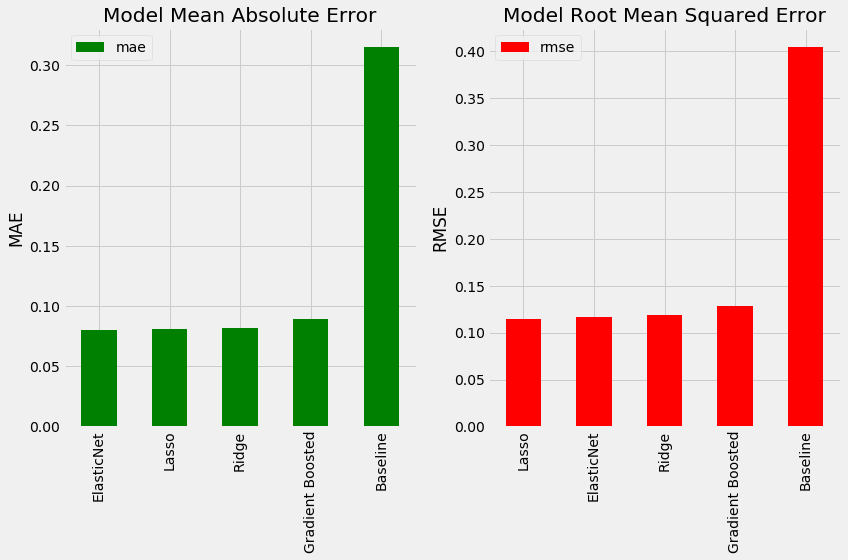

In [191]:
plt.figure(figsize=(12, 8))
#matplotlib.rcParams['font.size'] = 10
# Root mean squared error
ax =  plt.subplot(1, 2,1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'g', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [192]:
# tuned models performance
results

,mae,rmse
Ridge,0.082,0.119
Lasso,0.081,0.114
ElasticNet,0.080,0.117
Gradient Boosted,0.089,0.129
Baseline,0.315,0.404


#### Validation function

In [255]:
train_temp = train.drop(['Id', 'TARGET'], axis=1)

In [256]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [257]:
train_temp = clean_dataset(train_temp)

In [258]:
train_temp = train_temp.as_matrix().astype(np.float)
#TARGET_log = TARGET_log.as_matrix().astype(np.float)

In [267]:
# validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_temp)
    rmse= np.sqrt(-cross_val_score(model, train_temp, TARGET_log.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### Average Models Stacking

In [268]:
# averaging models class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [269]:
# evaluate averaging models score
averaged_models = AveragingModels(models = (model1, model2, model3, model4))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1106 (0.0068)



#### Averaged base models with meta-model

In [270]:
# averaged models class with meta-model
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [271]:
# evaluate averaging models score
stacked_averaged_models = StackingAveragedModels(base_models = (model1, model2, model4),
                                                 meta_model = model3)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1105 (0.0061)


### Ensembling StackedRegressor, XGBoost and LightGBM

We add XGBoost and LightGBM to the StackedRegressor defined previously

We first define a rmsle evaluation function

In [272]:
# validation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [278]:
test_temp = test.drop('Id', axis=1).as_matrix().astype(np.float)

In [277]:
test.head()

,Id,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,13.224,6.221,20.479,1,14.121,14.121,0.000,10.105,7.397,8.781,...,0,0,0,1,0,0,0,0,1,0
1459,13.226,6.245,21.327,1,14.117,14.117,6.808,11.901,0.000,9.752,...,0,0,0,1,0,0,0,0,1,0
1460,13.228,6.073,21.197,1,14.178,14.180,0.000,11.477,0.000,7.294,...,0,0,0,1,0,0,0,0,1,0
1461,13.230,6.173,19.865,1,14.180,14.180,3.859,10.750,0.000,9.208,...,0,0,0,1,0,0,0,0,1,0
1462,13.232,5.094,17.257,1,14.170,14.170,0.000,8.720,0.000,12.173,...,0,0,0,1,0,0,0,0,1,0


#### Final training and prediction

##### Staked Models Prediction

In [279]:
# staked models prediction and validation
stacked_averaged_models.fit(train_temp, TARGET_log.values)
stacked_train_pred = stacked_averaged_models.predict(train_temp)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_temp))
print(rmsle(TARGET_log, stacked_train_pred))

0.07499308664079535


##### XGB Models Prediction

In [287]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)

In [288]:
# xgb prediction and validation
model_xgb.fit(train_temp, TARGET_log.values)
xgb_train_pred = model_xgb.predict(train_temp)
xgb_pred = np.expm1(model_xgb.predict(test_temp))
print(rmsle(TARGET_log, xgb_train_pred))

0.07652972554709532


##### LGB Model Prediction

In [289]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=10,
                              learning_rate=0.1, n_estimators=170,
                              max_bin = 60, max_depth=3)


In [290]:
# lgbm prediction and validation
model_lgb.fit(train_temp, TARGET_log.values)
lgb_train_pred = model_lgb.predict(train_temp)
lgb_pred = np.expm1(model_lgb.predict(test_temp))
print(rmsle(TARGET_log, xgb_train_pred))

0.07652972554709532


#### Stacked Model Validation

In [305]:
# validation with weights
'''RMSE on the entire Train data when averaging'''

print('RMSE score on train data:')
print(rmsle(TARGET_log,stacked_train_pred*0.74 +
               xgb_train_pred*0.13 + lgb_train_pred*0.13 ))

RMSE score on train data:
0.07392688886902342


In [295]:
# calculate ensamble scores:
rmsle_predictions = stacked_pred*0.74 + xgb_pred*0.13 + lgb_pred*0.13